###**Welcome!**###

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving 50_Startups.csv to 50_Startups.csv


###**New Data Set**###
Since our data set from the last project was more suitable for classification as opposed to regression, we decided use a startup business dataset for this project.

In [ ]:
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from numpy import math

In [ ]:
df = pd.read_csv('50_Startups.csv')

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
dfc = df.drop(df.columns[3], axis=1)

In [ ]:
dfc.shape

(50, 4)

In [ ]:
dfc.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


##**Simple Linear Regression**##
Below is where we will do simple linear regression.

In [ ]:
#Function to normalize columns
def normalize_numeric_minmax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)

In [ ]:
# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
import collections
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

In [ ]:
# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
dfcs = df.drop(df.columns[3], axis=1)
dfcs.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [ ]:
dfcs = dfcs.drop(df.columns[1], axis=1)
dfcs.head()

,R&D Spend,Marketing Spend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94


In [ ]:
dfcsa = dfcs.drop(df.columns[2], axis=1)
dfcsa.head()

,R&D Spend,Profit
0,165349.20,192261.83
1,162597.70,191792.06
2,153441.51,191050.39
3,144372.41,182901.99
4,142107.34,166187.94


In [ ]:
normalize_numeric_minmax(dfcsa,"R&D Spend")
dfcsa[0:5]

,R&D Spend,Profit
0,1.000000,192261.83
1,0.983359,191792.06
2,0.927985,191050.39
3,0.873136,182901.99
4,0.859438,166187.94


In [ ]:
x,y = to_xy(dfcsa,'Profit')

In [ ]:
#Split for train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
prof_regr = linear_model.LinearRegression()

# Fit regression model to the training set
prof_regr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = prof_regr.predict(x_test)

In [ ]:
for i in range(10):
    print("True price : ",y_test[i],"Prediction : ", y_pred[i])

True price :  134307.34 Prediction :  127118.93
True price :  81005.76 Prediction :  81917.164
True price :  99937.59 Prediction :  101742.55
True price :  64926.08 Prediction :  50145.17
True price :  125370.37 Prediction :  129373.164
True price :  35673.41 Prediction :  49757.58
True price :  105733.54 Prediction :  113022.625
True price :  107404.34 Prediction :  104001.4
True price :  97427.84 Prediction :  102939.03
True price :  122776.86 Prediction :  122404.78


In [ ]:
print(prof_regr.coef_, prof_regr.intercept_)

[139875.23] 49299.04


Root mean squared error = 7766.3936
R-squared = 0.9571


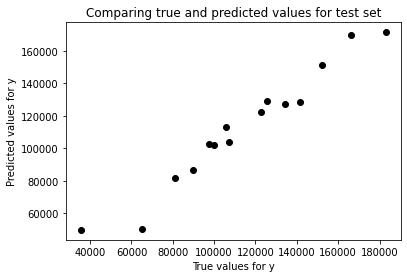

In [ ]:
# Comparing true versus predicted values
plt.scatter(y_test, y_pred, color='black')
#plt.plot(y_train, prof_regr.coef_*x_train + prof_regr.intercept_)
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared = %.4f' % r2_score(y_test, y_pred))

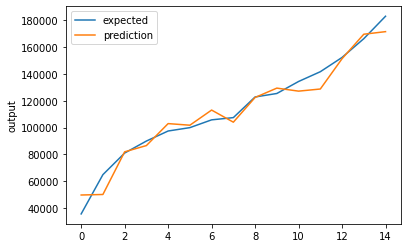

In [ ]:
chart_regression(y_pred,y_test)

###**Predicting Test Data That is Within the Training Range of X (*Interpolation)**###
Below is where we predict data using values that are within our training range.

In [ ]:
for i in range(10):
    print("True price : ",y_test[i],"Prediction : ", y_pred[i])

True price :  134307.34 Prediction :  127118.93
True price :  81005.76 Prediction :  81917.164
True price :  99937.59 Prediction :  101742.55
True price :  64926.08 Prediction :  50145.17
True price :  125370.37 Prediction :  129373.164
True price :  35673.41 Prediction :  49757.58
True price :  105733.54 Prediction :  113022.625
True price :  107404.34 Prediction :  104001.4
True price :  97427.84 Prediction :  102939.03
True price :  122776.86 Prediction :  122404.78


###**Predicting Test Data That is Outside the Training Range of X (*Extrapolation)**###
Below is where we predict data using values that are out of our training range.

In [ ]:
prof_regr.predict([[0]])

array([49299.0390625])

In [ ]:
prof_regr.predict([[1]])

array([189174.2734375])

In [ ]:
prof_regr.predict([[-1]])

array([-90576.1953125])

In [ ]:
prof_regr.predict([[2]])

array([329049.5078125])

##**Multiple Linear Regression**##
Below is where we will do multiple linear regression. Unlike with simple regression, our x array will now have multiple columns.

In [ ]:
#Function to normalize columns
def normalize_numeric_minmax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)

In [ ]:
# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
import collections
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

In [ ]:
# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

In [ ]:
x,y = to_xy(dfc,'Profit')

In [ ]:
dfc[0:5]

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [ ]:
normalize_numeric_minmax(dfc,"R&D Spend")
normalize_numeric_minmax(dfc,"Administration") 
normalize_numeric_minmax(dfc,"Marketing Spend") 
dfc[0:5]

,R&D Spend,Administration,Marketing Spend,Profit
0,1.000000,0.651744,1.000000,192261.83
1,0.983359,0.761972,0.940893,191792.06
2,0.927985,0.379579,0.864664,191050.39
3,0.873136,0.512998,0.812235,182901.99
4,0.859438,0.305328,0.776136,166187.94


In [ ]:
# to xy to convert pandas to tensor flow
x,y=to_xy(dfc,"Profit")

In [ ]:
#Split for train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
x_train.shape

(35, 3)

In [ ]:
x_test.shape

(15, 3)

In [ ]:
y_train.shape

(35,)

In [ ]:
y_test.shape

(15,)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
prof_regr = linear_model.LinearRegression()

# Fit regression model to the training set
prof_regr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = prof_regr.predict(x_test)

In [ ]:
for i in range(10):
    print("True price : ",y_test[i],"Prediction : ", y_pred[i])

True price :  134307.34 Prediction :  125972.16
True price :  81005.76 Prediction :  85471.92
True price :  99937.59 Prediction :  98924.15
True price :  64926.08 Prediction :  46639.79
True price :  125370.37 Prediction :  128142.125
True price :  35673.41 Prediction :  52602.195
True price :  105733.54 Prediction :  108364.69
True price :  107404.34 Prediction :  100331.586
True price :  97427.84 Prediction :  97538.56
True price :  122776.86 Prediction :  112496.7


In [ ]:
print(prof_regr.coef_, prof_regr.intercept_)

[132601.73  -11584.684  13849.927] 52208.066


Root mean squared error = 9042.7969
R-squared = 0.9419


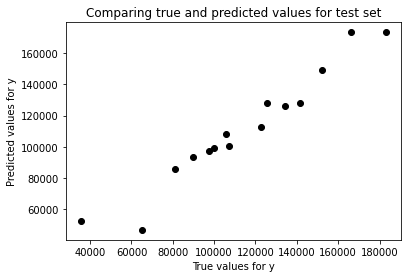

In [ ]:
# Comparing true versus predicted values
plt.scatter(y_test, y_pred, color='black')
#plt.plot(y_train, prof_regr.coef_*x_train + prof_regr.intercept_)
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared = %.4f' % r2_score(y_test, y_pred))

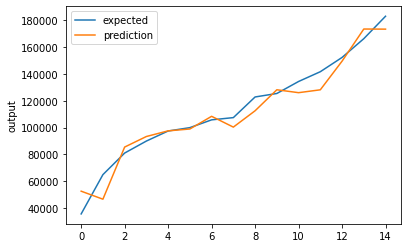

In [ ]:
chart_regression(y_pred,y_test)

In [ ]:
dfc

,R&D Spend,Administration,Marketing Spend,Profit
0,1.000000,0.651744,1.000000,192261.83
1,0.983359,0.761972,0.940893,191792.06
2,0.927985,0.379579,0.864664,191050.39
3,0.873136,0.512998,0.812235,182901.99
4,0.859438,0.305328,0.776136,166187.94
5,0.797566,0.369448,0.769126,156991.12
6,0.814128,0.730161,0.270710,156122.51
7,0.788018,0.717457,0.686493,155752.60
8,0.729018,0.741733,0.660500,152211.77
9,0.745906,0.436929,0.646443,149759.96


###**Predicting Test Data That is Within the Training Range of X (*Interpolation)**###
Below is where we predict data using values that are within our training range.

In [ ]:
for i in range(10):
    print("True price : ",y_test[i],"Prediction : ", y_pred[i])

True price :  134307.34 Prediction :  125972.16
True price :  81005.76 Prediction :  85471.92
True price :  99937.59 Prediction :  98924.15
True price :  64926.08 Prediction :  46639.79
True price :  125370.37 Prediction :  128142.125
True price :  35673.41 Prediction :  52602.195
True price :  105733.54 Prediction :  108364.69
True price :  107404.34 Prediction :  100331.586
True price :  97427.84 Prediction :  97538.56
True price :  122776.86 Prediction :  112496.7


###**Predicting Test Data That is Outside the Training Range of X (*Extrapolation)**###
Below is where we predict data using values that are out of our training range.

In [ ]:
prof_regr.predict([[0, 0, 0]])

array([52208.06640625])

In [ ]:
prof_regr.predict([[1, 1, 1]])

array([187075.04394531])

In [ ]:
prof_regr.predict([[0, 0, -1]])

array([38358.13964844])

In [ ]:
prof_regr.predict([[-1, -1, -1]])

array([-82658.91113281])

In [ ]:
prof_regr.predict([[1, 1, 2]])

array([200924.97070312])

In [ ]:
prof_regr.predict([[2, 2, 2]])

array([321942.02148438])

#Regression and Classification in Provided Dataset#

In [ ]:
# uploading Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv
from google.colab import files

uploaded = files.upload()

Saving Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv to Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv


In [ ]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

Observations: Having a higher GRE score, higher TOEFL Score, University rating, SOP, and LOR seems to result in a higher chance of admit



##Simple Linear Regression##

For the simple linear regression, we chose the independent x variable to be the candidate's GRE Score and the dependent y variable to be the Chance of Admit. 

In [ ]:
data = pd.read_csv("Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv")

# Divide the data into independent and dependent variables
x = pd.DataFrame(data['GRE Score'])
y = pd.DataFrame(data['Chance of Admit '])

# Split data into training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


Next, we create the Linear Regression, fit the regression model to the training set, and apply the model to the test set.

In [ ]:
# Create linear regression object.
regressor = LinearRegression()

# Fit regression model to training set.
regressor.fit(x_train, y_train)

# Apply model to the test set
y_pred_test = regressor.predict(x_test)


Comparing the true vs. predicted values is as follows: 

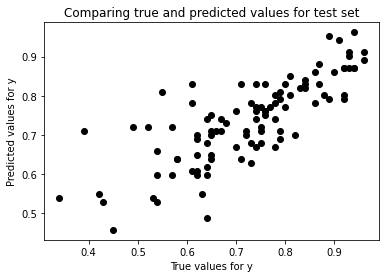

In [ ]:
# Comparing true versus predicted values
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')
plt.show()


Next, we evaluate the model

In [ ]:
# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

Root mean squared error = 0.0862
R-squared = 0.6153


The linear regression line is as follows:

In [ ]:
# Display model parameters
intercept = regressor.intercept_
slope = regressor.coef_
print("y intercept: ", intercept)
print("slope: ", slope)

y intercept:  [-2.47809124]
slope:  [[0.01011923]]


Finally, we compare the test data to our linear regression line


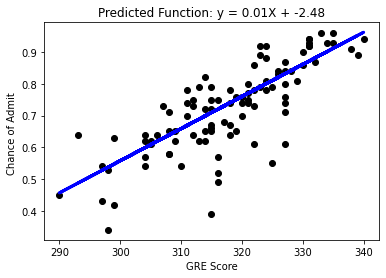

In [ ]:
# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test.to_numpy(), y_pred_test, color='blue', linewidth=3)
titlestr = 'Predicted Function: y = %.2fX + %.2f' % (slope, intercept)
plt.title(titlestr)
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit ')
plt.show()


##Multiple Linear Regression##

First, we will split the data into multiple independent variables. We already have our dependent variable from the intial split in the Simple Linear Regression.

In [ ]:
ind_vars = ["GRE Score", "TOEFL Score", "CGPA"]
X = data[ind_vars]

We will now split the data into training and test data with a 80/20 split.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=.80)

Next we will create the regression object, fit the model to the training set, and apply it to the test set.

In [ ]:
# Create linear regression object
regressor = LinearRegression()

# Fit regression model to the training set
regressor.fit(X_train, y_train)

# Apply model to the test set
y_pred = regressor.predict(X_test)

Comparing true versus predicted values

Root mean squared error = 0.0643
R-squared = 0.7633


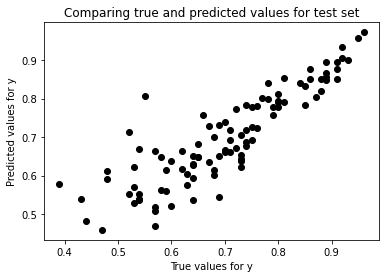

In [ ]:
plt.scatter(y_test, y_pred, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared = %.4f' % r2_score(y_test, y_pred))

Now we can compare the test data to our linear regression line


Slope =  0.0025300530071754564
Intercept =  -1.6424396080709758


Text(0, 0.5, 'y')

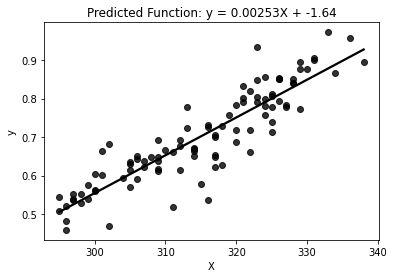

In [ ]:
# Display model parameters
print('Slope = ', regressor.coef_[0][0])
print('Intercept = ', regressor.intercept_[0])

# Plot outputs
titlestr = 'Predicted Function: y = %.5fX + %.2f' % (regressor.coef_[0][0], regressor.intercept_[0])
plt.title(titlestr)
sns.regplot(x=X_test.iloc[:,0],y=y_pred,ci=None,color ='black');
plt.xlabel('X')
plt.ylabel('y')

##Classification##

In [ ]:
#imports
from sklearn.tree import export_graphviz 
from six import StringIO
from IPython.display import Image   
import pydotplus

First we will discretize the last column "Chance of Admit" into three classes. Our classification is as follows: 0 - 0.33 is low, 0.34 - 0.66 is medium, and 0.67 - 1.00 is high.

In [ ]:
data
discretized_data = data
discretized_data['class'] = pd.cut(data['Chance of Admit '], [0, 0.33, 0.66, 1.0], labels=['low', 'medium', 'high'])
discretized_data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,class
0,1,337,118,4,4.5,4.5,9.65,1,0.92,high
1,2,324,107,4,4.0,4.5,8.87,1,0.76,high
2,3,316,104,3,3.0,3.5,8.00,1,0.72,high
3,4,322,110,3,3.5,2.5,8.67,1,0.80,high
4,5,314,103,2,2.0,3.0,8.21,0,0.65,medium
...,...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87,high
496,497,337,117,5,5.0,5.0,9.87,1,0.96,high
497,498,330,120,5,4.5,5.0,9.56,1,0.93,high
498,499,312,103,4,4.0,5.0,8.43,0,0.73,high


We can now split the data, selecting GRE Score, TOEFL Score, CGPA, and University Ranking as the independet variables with Chnace of Admit remaining as the dependent variable. We utilize a 80/20 training/test split.

In [ ]:
#split dataset in independent and dependent variable
independent_cols = ['GRE Score', 'TOEFL Score', 'CGPA', 'University Rating']
X = discretized_data[independent_cols]
y = discretized_data['class']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Now we create a Decision Tree Model using Scikit-learn, and then we evaluate the model.

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
y
# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8


As you can see, after comparing test values and prediocted values, we get a classification rate of 80%. Below is the deciscion tree displayed using graphviz.

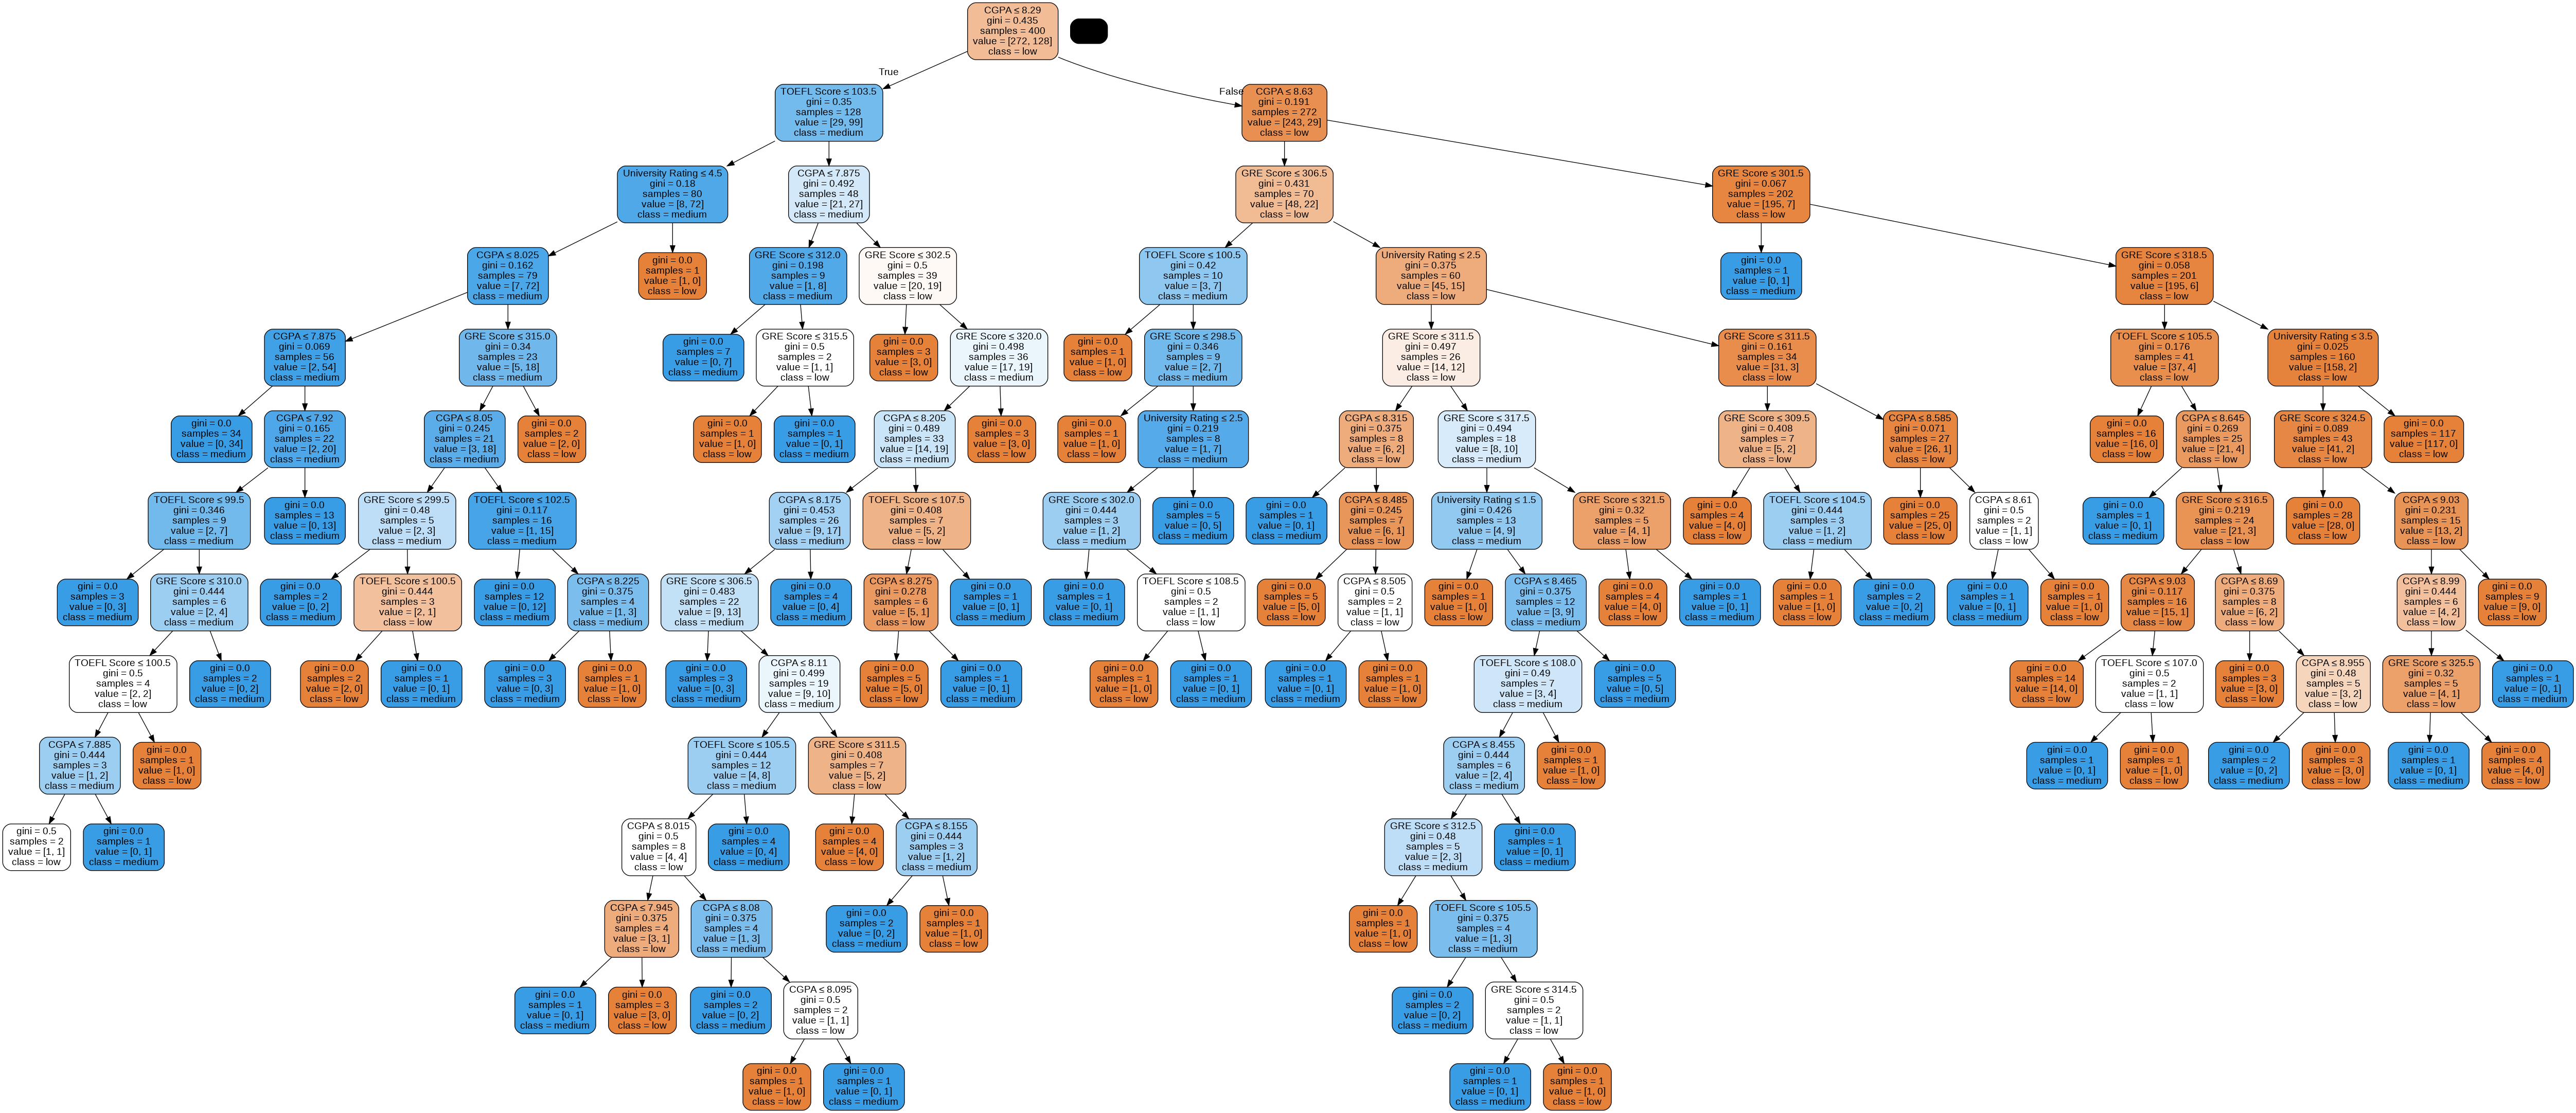

In [ ]:
dot_data = StringIO() 
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,special_characters=True,feature_names=independent_cols,class_names=['low', 'medium', 'high'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())   
graph.write_png('admission.png') 
Image(graph.create_png()) 

We can take this a step further to try and improve our accuracy. We selected entropy as our attribute selection measure with a maximum depth of 5 for the tree. This increased our accuracy to 83%. While the accuracy is better, choosing a higher value for maximum depth can cause over fitting and choosing a lower value can cause underfitting. Below is the decision tree and some rules we observed for each of the classes.

Accuracy: 0.83


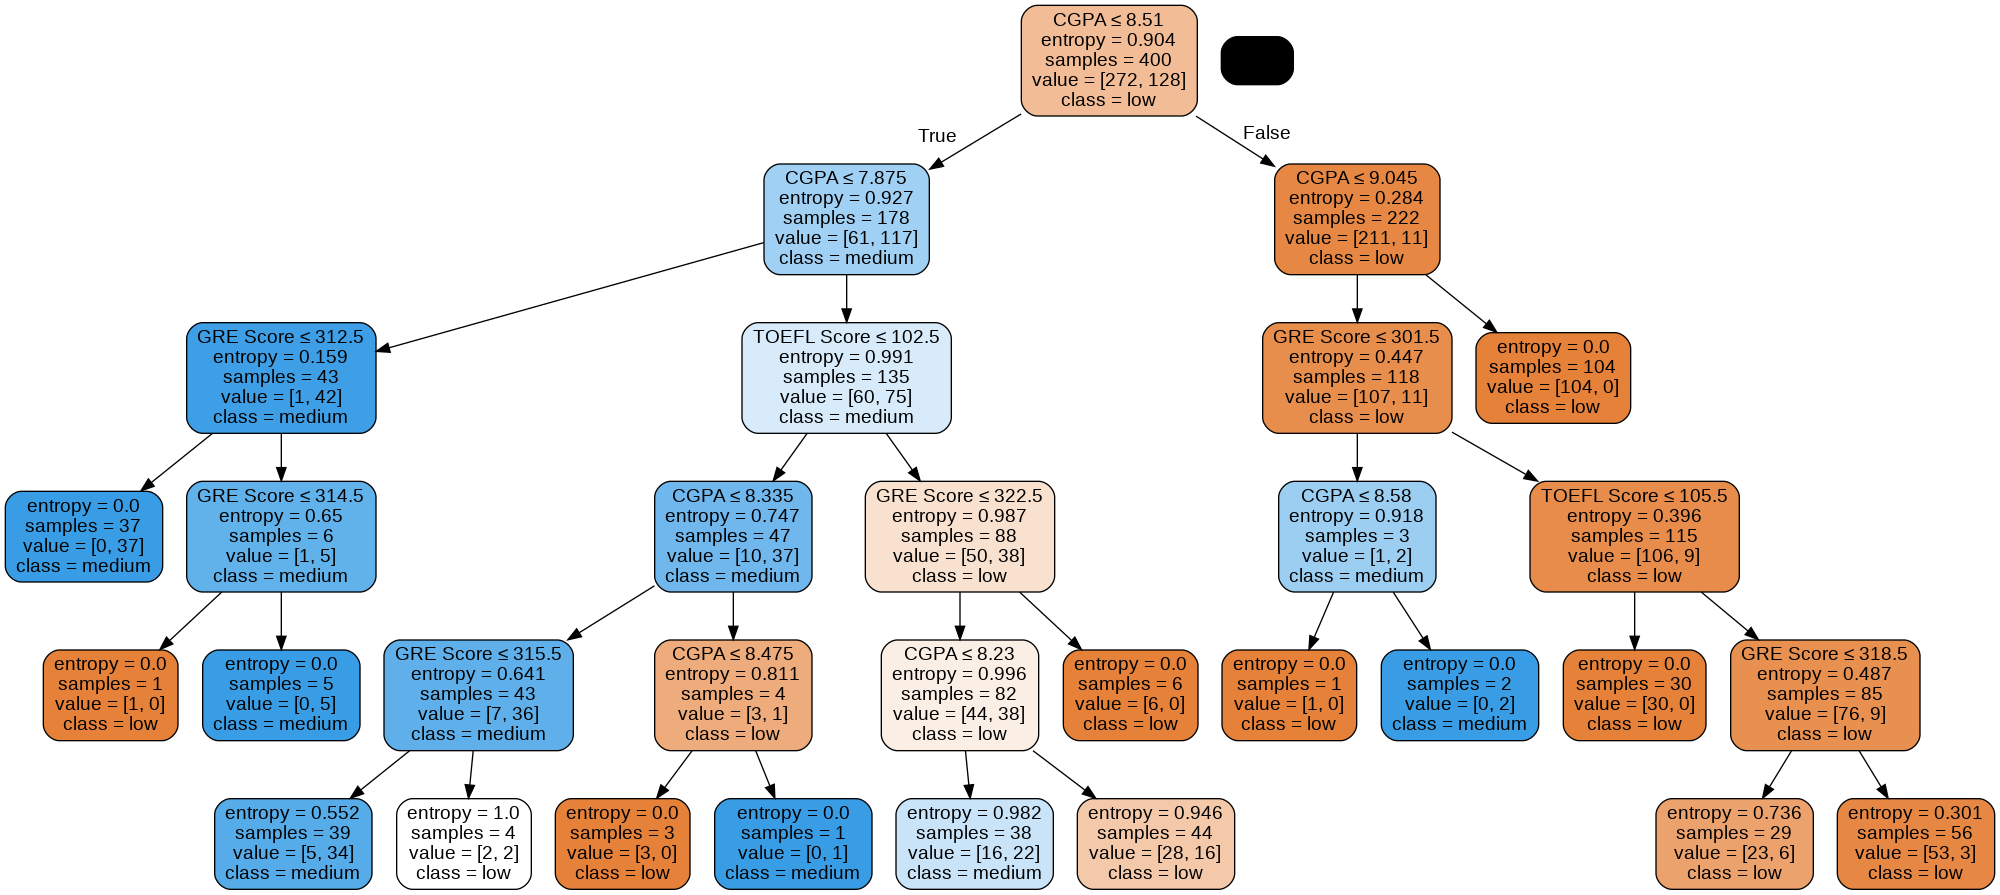

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

dot_data = StringIO() 
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,special_characters=True,feature_names=independent_cols,class_names=['low', 'medium', 'high'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())   
graph.write_png('ad.png') 
Image(graph.create_png()) 

If CGPA is greater than 9.05 then the chance of addmission is high.

If CGPA is less than or equal to 9.045 and GRE Score is less than 301.5 and TOEFL Score is less than or equal to 105.5, the chance of admisison is low.

If CGPA is less than 7.875 and TOEFL Score is less than or equal to 102.5 then the chance of admission is medium.